# ChE Math Project 2: Mathematical modeling of dimer exhange assay of estrogen receptors

Reference: Goulet, D., 2016. Modeling, simulating, and parameter fitting of biochemical kinetic experiments. siam REVIEW, 58(2), pp.331-353.

Estrogen receptor $ER\alpha$ is found in various cell types in human body. Understanding the rates of formation of these receptors is of particular interest due to their correlation with breast cancer. Typically, the dimer exchange assay protocol is employed for the laboratory studies of estrogen receptors.

The ligand binding protein domain of the estrogen receptor is a monomer $(M_{1})$ which rapidly dimerizes $(D_{11})$ in solution. The equilibrium of the monomer-dimer solution is achieved rapidly and thus, the kinetics of formation of dimer cannot be observed experimentally. Thus, the dimer exchange assay protocol is employed which involves addition of maltose binding protein monomer $(M_{2})$ to the ligand binding protein. This results in sufficiently high equilibriation times to allow the kinetics to be recorded. However, this also results in formation of two other dimers - the fusion dimer $(D_{22})$ and the heterodimer $(D_{12})$.

\begin{align}
1. M_{1} + M_{1} \leftrightarrow D_{11}
\end{align}
\begin{align}
2. M_{2} + M_{2} \leftrightarrow D_{22}
\end{align}
\begin{align}
3. M_{1} + M_{2} \leftrightarrow D_{12}
\end{align}

Let $k_{1f}$ and $k_{1r}$ be forward and backward rate constants for the first reaction. Similarly, $k_{2f}$ and $k_{2r}$ for second reaction and $k_{3f}$ and $k_{3r}$ for third reaction. 

Using the law of mass action, we can get the following species balance equations:

\begin{align}
\frac{dM_{1}}{dt}=-2k_{1f}(M_{1})^{2}+2k_{1r}(D_{11})-k_{3f}(M_{1})(M_{2})+k_{3r}(D_{12})
\end{align}

\begin{align}
\frac{dM_{2}}{dt}=-2k_{2f}(M_{2})^{2}+2k_{2r}(D_{22})-k_{3f}(M_{1})(M_{2})+k_{3r}(D_{12})
\end{align}

\begin{align}
\frac{dD_{11}}{dt}=k_{1f}(M_{1})^{2}-k_{1r}(D_{11})
\end{align}

\begin{align}
\frac{dD_{22}}{dt}=k_{2f}(M_{2})^{2}-k_{2r}(D_{22})
\end{align}

\begin{align}
\frac{dD_{12}}{dt}=k_{3f}(M_{1})(M_{2})-k_{3r}(D_{12})
\end{align}

The above model can be reduced based on the fact that monomesr are never destroyed, they are simply incorporated into dimers.
Thus,
\begin{align}
\frac{d(M_{1}+2D_{11}+D_{12})}{dt}=0
\end{align}

\begin{align}
\frac{d(M_{2}+2D_{22}+D_{12})}{dt}=0
\end{align}

##### Assumptions
1. Addition of maltose binding protein to ligand binding protein does not significantly alter dimerization kinetic parameters. Thus, $k_{1f} = k_{2f} = k_{3f}/2 = k_{f}$ and $k_{1r} = k_{2r} = k_{3r} = k_{r}$
2. Initial monomer concenrations are negligible

Incorporating the above assumptions in the system of ordinary differential equations of species balance, the model can be reduced to the following three equations:

\begin{align}
\frac{dD_{11}}{dt}=k_{f}(2D_{11}(t_{0})+D_{12}(t_{0})-2D_{11}+D_{12})^{2}-k_{r}(D_{11})
\end{align}

\begin{align}
\frac{dD_{22}}{dt}=k_{f}(2D_{22}(t_{0})+D_{12}(t_{0})-2D_{22}+D_{12})^{2}-k_{r}(D_{22})
\end{align}

\begin{align}
\frac{dD_{12}}{dt}=2k_{f}(2D_{11}(t_{0})+D_{12}(t_{0})-2D_{11}+D_{12})(2D_{22}(t_{0})+D_{12}(t_{0})-2D_{22}+D_{12})-k_{r}(D_{12})
\end{align}

where, $t_{0}$ is initial time

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Experimental data for dimerization assay kinetics

In [2]:
data=pd.read_csv("data.csv", skiprows=0) #using data frames to read csv file 
data

,time (h),D11,D22,D12
0,0.033333,1.71,1.75,0.62
1,1.000000,1.56,1.59,0.93
2,2.000000,1.40,1.43,1.26
3,3.000000,1.28,1.31,1.50
4,4.000000,1.14,1.17,1.78
5,5.000000,1.17,1.20,1.71
6,6.000000,1.14,1.17,1.78
7,7.000000,1.06,1.09,1.93
8,8.000000,1.10,1.13,1.86
9,9.000000,1.10,1.13,1.86


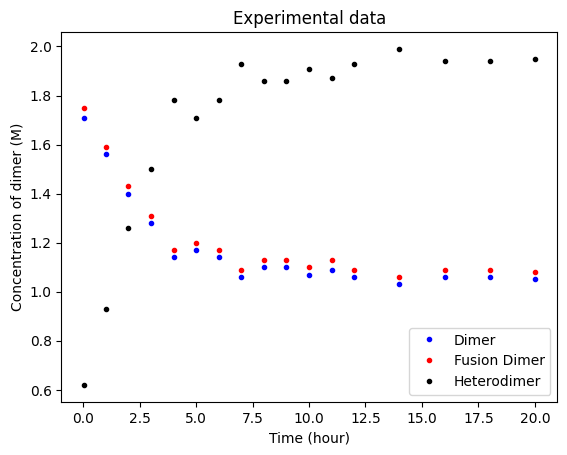

In [40]:
plt.plot(data["time (h)"],data["D11"], 'bo', markersize=3)
plt.plot(data["time (h)"],data["D22"], 'ro', markersize=3)
plt.plot(data["time (h)"],data["D12"], 'ko', markersize=3)
plt.xlabel("Time (hour)")
plt.ylabel("Concentration of dimer (M)")
plt.title("Experimental data")
plt.legend(tuple(['Dimer','Fusion Dimer' , 'Heterodimer']))

### Defining the function to solve the systems of ODEs

In [4]:
#Known values
d11_o = 1.71 #M
d22_o = 1.75 #M
d12_o = 0.62 #M

from scipy.integrate import odeint 
def odes(v,t,kf,kr): 

    D11 = v[0]
    D22 = v[1]
    D12 = v[2]
    
    f = [kf*(2*d11_o + d12_o - 2*D11 - D12)**2 - kr*D11, 
         kf*(2*d22_o + d12_o - 2*D22 - D12)**2 - kr*D22,
         2*kf*(2*d11_o + d12_o - 2*D11 - D12)*(2*d22_o + d12_o - 2*D22 - D12) - kr*D12]
    return f 

ic = [data["D11"].loc[0] , data["D22"].loc[0], data["D12"].loc[0]] #initial condition
time = data["time (h)"]
training_data1 = data.to_numpy()
training_data = training_data1[:,[1,2,3]]


print(ic)
print(training_data)

[1.71, 1.75, 0.62]
[[1.71 1.75 0.62]
 [1.56 1.59 0.93]
 [1.4  1.43 1.26]
 [1.28 1.31 1.5 ]
 [1.14 1.17 1.78]
 [1.17 1.2  1.71]
 [1.14 1.17 1.78]
 [1.06 1.09 1.93]
 [1.1  1.13 1.86]
 [1.1  1.13 1.86]
 [1.07 1.1  1.91]
 [1.09 1.13 1.87]
 [1.06 1.09 1.93]
 [1.03 1.06 1.99]
 [1.06 1.09 1.94]
 [1.06 1.09 1.94]
 [1.05 1.08 1.95]]


### Parameter fitting

In [5]:
def RMSE(para):
    kf, kr = para;
    ODE_output = odeint(odes, ic, time, args = (kf,kr));
    err = training_data - ODE_output
    return np.sqrt(np.sum(err**2))  

# Check that function works correctly
RMSE([100,1]) 

1.3440419618118633

In [38]:
from scipy.optimize import minimize

sol1 = minimize(RMSE, x0 = (280, 0.1));

print(sol1);

C:\Users\shrey\AppData\Roaming\Python\Python310\site-packages\scipy\integrate\_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


      fun: 0.38108519866792356
 hess_inv: array([[0.41656698, 0.11359929],
       [0.11359929, 0.03246353]])
      jac: array([0.00011528, 0.00029674])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 181
      nit: 9
     njev: 55
   status: 2
  success: False
        x: array([278.98170532,   0.3063763 ])


Text(0.5, 1.0, 'Comparison of model and experimental data')

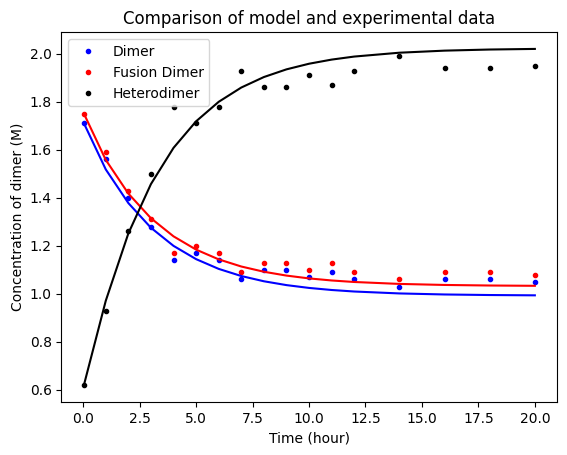

In [42]:
y = odeint(odes, ic, time, args=(279, 0.31))

plt.plot(data["time (h)"],data["D11"], 'bo', markersize=3)
plt.plot(data["time (h)"],data["D22"], 'ro', markersize=3)
plt.plot(data["time (h)"],data["D12"], 'ko', markersize=3)

plt.xlabel("Time (hour)")
plt.ylabel("Concentration of dimer (M)")
plt.legend(tuple(['Dimer','Fusion Dimer' , 'Heterodimer']))
plt.plot(data["time (h)"], y[:,0], 'b')
plt.plot(data["time (h)"], y[:,1], 'r')
plt.plot(data["time (h)"], y[:,2], 'k')
plt.title("Comparison of model and experimental data")

The above plot indicates that the parameters fit well do the experimental data. The guess values for the parameter were obtained from the reference paper's fitted parameter values. The kf parameter is difficult to obtain using this system of equations and it converges very close to the guess value. This is due to the assumption that initial monomer concentrations are equal to zero and initial condition values for dimer concentration being used at time = 0.03 hours instead of zero. This observation is also verified by the paper. The value for kr converges close to the value obtained in the paper from a reasonable initial guess. 

The parametric fits obtained in the paper are (kf,kr)=(284,0.238)

### Local sensitivity analysis 

The parametric sensitivity analysis is performed below changing the parameter values by 1%

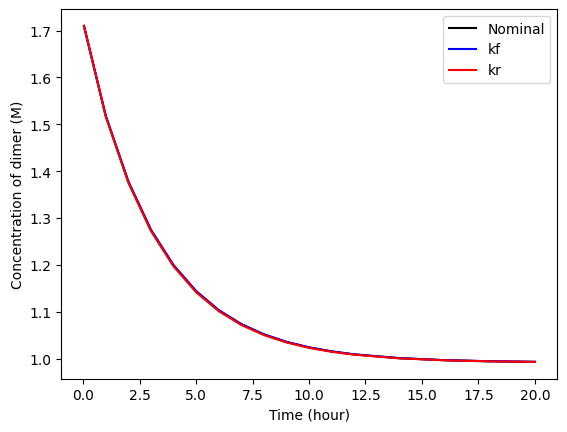

In [66]:
y1 = odeint(odes, ic, time, args=(279*1.01, 0.31))
y2 = odeint(odes, ic, time, args=(279, 0.31*1.01))

plt.xlabel("Time (hour)")
plt.ylabel("Concentration of dimer (M)")
plt.plot(time, y[:,0],'k', label = "Nominal")
plt.plot(time, y1[:,0],'b', label = "kf")
plt.plot(time, y2[:,0],'r', label = "kr")
plt.legend()

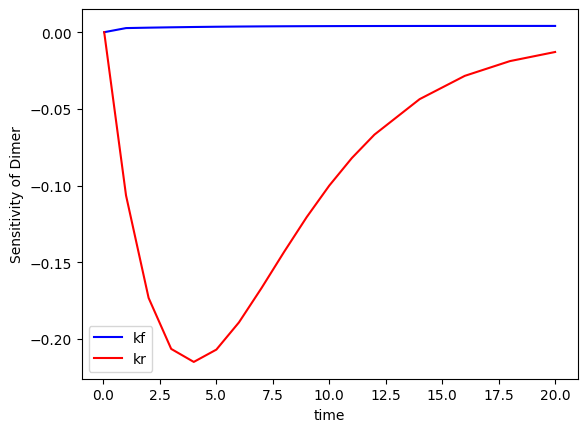

In [67]:
plt.xlabel("time")
plt.ylabel("Sensitivity of Dimer")
plt.plot(time, ((y1[:,0] - y[:,0])/y[:,0])/0.01,'b', label = "kf");
plt.plot(time, ((y2[:,0] - y[:,0])/y[:,0])/0.01,'r', label = "kr");
plt.legend()

The above analysis indicates that kr is much more sensitive than kf. The sensitivity of kf is very close to zero also corroborating the fact that it is difficult to obtain in the first section of model fitting.

### Global sensitivity analysis

Perturbing the the parameters by 20% and plotting the fit for the dimer values at 1000 different values of parameter values and saving the dimer concentration values for all parameter values

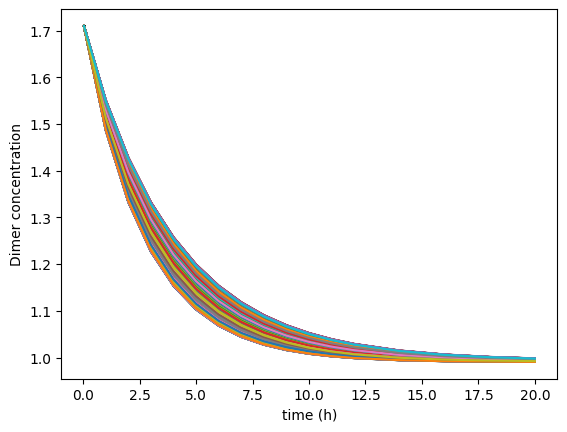

In [76]:
# generate several output for random selections of parameters
N = 1000
kf = np.random.uniform(279*0.8,279*1.2,N);
kr = np.random.uniform(0.31*0.8,0.31*1.2,N);

D11 = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(odes, ic, time, args = (kf[m],kr[m]));
    plt.plot(time,output[:,0]);
    plt.xlabel("time (h)");
    plt.ylabel("Dimer concentration");
    D11[m]=output[-1,1];

#### Confirming the data generated for parametric perturbations in uniform

In [69]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


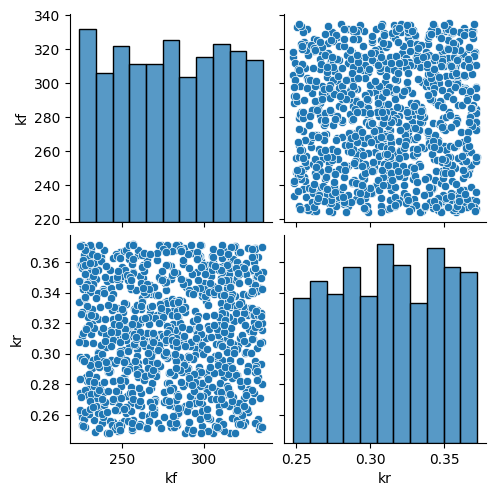

In [70]:
import seaborn as sns

tmp = {'kf':kf, 'kr':kr};
df = pd.DataFrame(tmp);

sns.pairplot(df)  
plt.show()

This shows that the data has unoform distribution as expected

#### Computing normalized sensitivity 

Computing the sensitivity of parameter to dimer concentration using the data generated above when the parameters were perturbed by 20%

Our fitted eqn is y =  0.0031811286448036463 kf +  -0.020499943928739533 kr


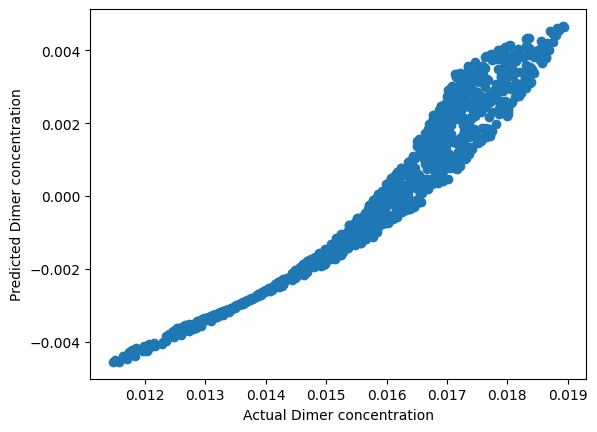

In [71]:
a = (1.05 - D11)/1.05
X = np.c_[(279-kf)/279,(0.31-kr)/0.31]

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ a;
print("Our fitted eqn is y = ",params[0], "kf + ", params[1], "kr")

plt.plot(a,X @ params,"o");
plt.ylabel("Predicted Dimer concentration");
plt.xlabel("Actual Dimer concentration");

In [72]:
#Confirming above linear regression results
import statsmodels.api as sm
model = sm.OLS(a, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.022
Model:                            OLS   Adj. R-squared (uncentered):              0.020
Method:                 Least Squares   F-statistic:                              11.07
Date:                Tue, 13 Dec 2022   Prob (F-statistic):                    1.76e-05
Time:                        13:22:29   Log-Likelihood:                          2727.3
No. Observations:                1000   AIC:                                     -5451.
Df Residuals:                     998   BIC:                                     -5441.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

The above global sensitivity analysis indicates that kr is a much more sensitive parameter than kf and it affects the predicted dimer concentration most significantly.

### Bifurcation analysis
The most sensitive parameter, kr, was chosen for the bifurcation analysis of this system. kr was chosen pver kf because its sensitivity is very close to zero and it is not expected to chnage the output of the model significantly.

Text(0.5, 0, 'D11')

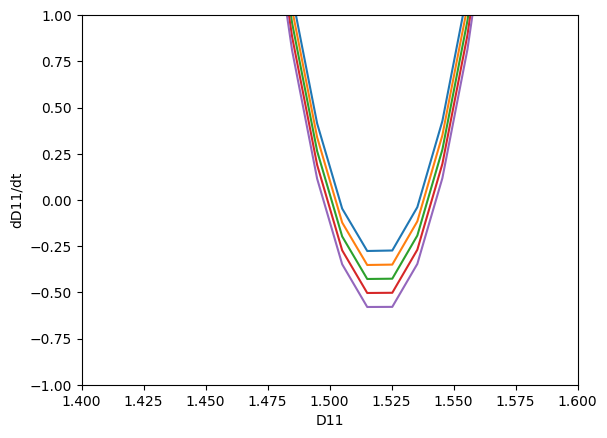

In [75]:
def odes_new(v,kf,kr): 

    D11 = v[0]
    D22 = v[1]
    D12 = v[2]
    
    f_new = [kf*(2*d11_o + d12_o - 2*D11 - D12)**2 - kr*D11, 
         kf*(2*d22_o + d12_o - 2*D22 - D12)**2 - kr*D22,
         2*kf*(2*d11_o + d12_o - 2*D11 - D12)*(2*d22_o + d12_o - 2*D22 - D12) - kr*D12]
    return f_new 

kr = np.linspace(0.2,0.4,5)
kf = 284

D11_values = np.linspace(1,2,100)
D12_values = np.ones(100)
D22_values = np.ones(100)
# D_values = np.array([D11_values, D12_values, D22_values])

for n in kr:
    plt.plot(D11_values, odes_new(np.array([D11_values, D12_values, D22_values]),kf,n)[0])

plt.ylim(-1,1)
plt.xlim(1.4,1.6)
plt.ylabel("dD11/dt")
plt.xlabel("D11")

#plt.legend()

The above plot shows that changing the parameter by 33% does not affect the system and its trajectory.